In [1]:
from google.colab import drive
drive.mount('/content/drive/MyDrive/Colab Notebooks/Thesis/thesis/NIJ Recidivism')

Mounted at /content/drive


In [18]:
%cd 'NIJ Recidivism '

/content/drive/MyDrive/Colab Notebooks/Thesis/thesis/NIJ Recidivism 


In [29]:
%pip install cdt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.1/921.1 kB 12.2 MB/s eta 0:00:00
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=34e441377703d7de33c7325ca92414e9307882fb1fe468a569d5591b84f9ac1b
  Stored in directory: /root/.cache/pip/wheels/92/a8/b7/d8a067c31a74de9ca252bbe53dea5f896faabd25d55f541037
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=4f6ef6ff2865db463d8e0f6a20bd48650d6e84847048e41455ce9467dd4301ef
  Stored in directory: /root/.cache/pip/wheels/03/4c/36/bc6b70d88998635e0ec0e617d15cd97483f5008d6bb77c1c7a
Successfully built GPUtil skrebate


In [53]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import cdt
import sys
sys.path.append('Algorithms')
from notears.linear import notears_linear
from sklearn.preprocessing import StandardScaler

In [44]:
# Plotting function
def plot_graph(B, title):
    G = nx.DiGraph(B)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", arrowsize=20)
    plt.title(title)
    plt.show()

In [25]:
df = pd.read_csv('NIJ_s_Recidivism_Chall.csv')

In [128]:
# we will have to separate binary and discrete data so that we can use appropriate loss types...
# use one hot encoding?
non_numeric = df.select_dtypes(exclude=[np.number]).columns
for col in non_numeric:
    df[col] = df[col].astype('category').cat.codes
binary_cols= ['Gender', 'Race', 'Gang_Affiliated', 'Prior_Arrest_Episodes_DVCharges','Prior_Arrest_Episodes_GunCharges','Prior_Conviction_Episodes_Viol', 'Recidivism_Within_3years']
#data = df.iloc[:, 1:-4].to_numpy()
data = df[binary_cols].to_numpy()
data_scaled = StandardScaler().fit_transform(data)

In [129]:
print(data.shape)
print(data)

print(data_scaled.shape)
print(data_scaled)

(25835, 7)
[[ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  1  1]
 [ 1  0  0 ...  0  1  1]
 ...
 [ 1  0  0 ...  0  0  1]
 [ 0  1 -1 ...  0  0  0]
 [ 1  1  0 ...  0  0  1]]
(25835, 7)
[[ 0.37378118 -0.86028029 -0.05699969 ... -0.59918408 -0.69337604
  -1.16767363]
 [ 0.37378118 -0.86028029 -0.05699969 ... -0.59918408  1.44221886
   0.85640368]
 [ 0.37378118 -0.86028029 -0.05699969 ... -0.59918408  1.44221886
   0.85640368]
 ...
 [ 0.37378118 -0.86028029 -0.05699969 ... -0.59918408 -0.69337604
   0.85640368]
 [-2.6753621   1.16241185 -1.96696971 ... -0.59918408 -0.69337604
  -1.16767363]
 [ 0.37378118  1.16241185 -0.05699969 ... -0.59918408 -0.69337604
   0.85640368]]


In [130]:
G_est = notears_linear(data_scaled, lambda1=0, loss_type='logistic')
print(G_est)

overflow encountered in matmul
invalid value encountered in multiply
invalid value encountered in scalar multiply
overflow encountered in scalar multiply
overflow encountered in multiply


[[ 0.00000000e+00  0.00000000e+00  5.17132674e+02  0.00000000e+00
   0.00000000e+00 -8.54420973e+00  0.00000000e+00]
 [-2.65342466e+01  0.00000000e+00 -8.79450761e+01 -1.53543649e+01
   1.59737501e+01  2.29990291e+01 -2.49378210e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.35319744e-01  0.00000000e+00 -6.67779441e+00  0.00000000e+00
  -1.31060289e+00  8.12364790e+01 -2.03649157e+00]
 [ 1.46908178e+01  0.00000000e+00  7.80262096e+01 -4.03170696e-01
   0.00000000e+00 -1.19661463e+00  8.13439605e+00]
 [ 0.00000000e+00  0.00000000e+00  5.59424825e+01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-9.15825309e+00  0.00000000e+00  8.27928921e+01  0.00000000e+00
   0.00000000e+00  7.38264320e+00  0.00000000e+00]]


In [131]:
# Threshold small weights to turn into adjacency matrix
G_adj_est = (np.abs(G_est) > 1e-3).astype(int)
G_est_graph = nx.DiGraph(G_adj_est)
print(G_adj_est)

[[0 0 1 0 0 1 0]
 [1 0 1 1 1 1 1]
 [0 0 0 0 0 0 0]
 [1 0 1 0 1 1 1]
 [1 0 1 1 0 1 1]
 [0 0 1 0 0 0 0]
 [1 0 1 0 0 1 0]]


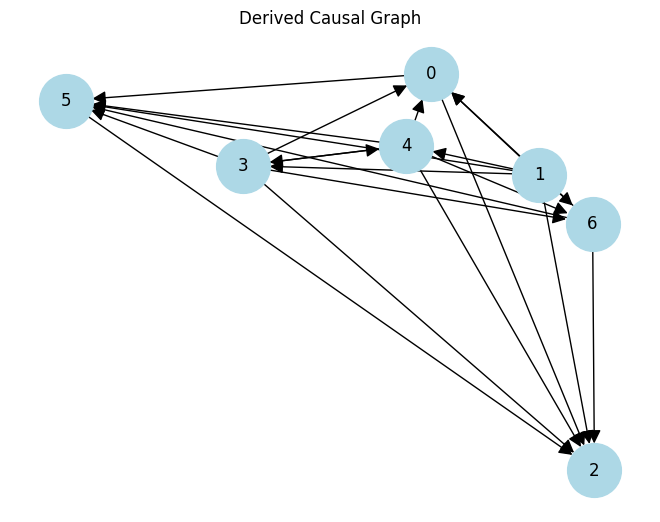

In [132]:
plot_graph(G_est_graph, "Derived Causal Graph")